In [1]:
####################################################################################
#                  ASSIGNMENT KEELA - CANDIDATE: ANNABELLE CHUINARD                # 
#                               PART 1: DATA PREP                                  #
####################################################################################

In [2]:
import os
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
### PART 1A: CLEANING ###
## File conversion ##

In [4]:
# Converting data into .csv format and renaming with meaningful names
samplePath = '/home/anabel/Keela/data/'

In [5]:
#os.rename(samplePath + 'adult.data', samplePath + 'adult_train.csv')
#os.rename(samplePath + 'adult.test', samplePath + 'adult_test.csv')
#os.rename(samplePath + 'adult.names', samplePath + 'adult_names.csv')

In [6]:
# Assigning feature name to each column of 'adult_train.csv' and 'adult_test.csv'
# Note: I found more info on "fnlwgt", the final sampling rate, on Google. See:https://www.methodsconsultants.com/tutorial/where-do-sampling-weights-come-from/
# These weights may be applied to correct distributions for the biases introduced by the censing procedures.

column_header = ["age", "workclass", "fnl_samp_wgt", "education", "education-num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country","income" ]

df = pd.read_csv( 
    samplePath + 'adult_train.csv',
    sep = ',\s', 
    header = None, 
    names = column_header,
    engine = 'python',
    na_values = ['?']) #transforming all '?' into 'NaN' 


df_test = pd.read_csv(
    samplePath + 'adult_test.csv',
    sep = ',\s',
    header = None, 
    names = column_header,
    engine = 'python',
    skiprows = 1,
    na_values = ['?']) #first row is useless title

# Mapping income feature to binary values
mapping = {'<=50K':0, '<=50K.':0, '>50K':1, '>50K.':1 }
df['income'] = df['income'].map(mapping)
df_test['income'] = df_test['income'].map(mapping)


# Concatenating both dataframe into a single one
df_full = pd.concat([df, df_test])
df_full.reset_index(inplace = True, drop = True)


In [7]:
df_full.head()


age         workclass  fnl_samp_wgt  education  education-num  \
0   39         State-gov         77516  Bachelors             13   
1   50  Self-emp-not-inc         83311  Bachelors             13   
2   38           Private        215646    HS-grad              9   
3   53           Private        234721       11th              7   
4   28           Private        338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

In [8]:
## Where are the problematic entries?

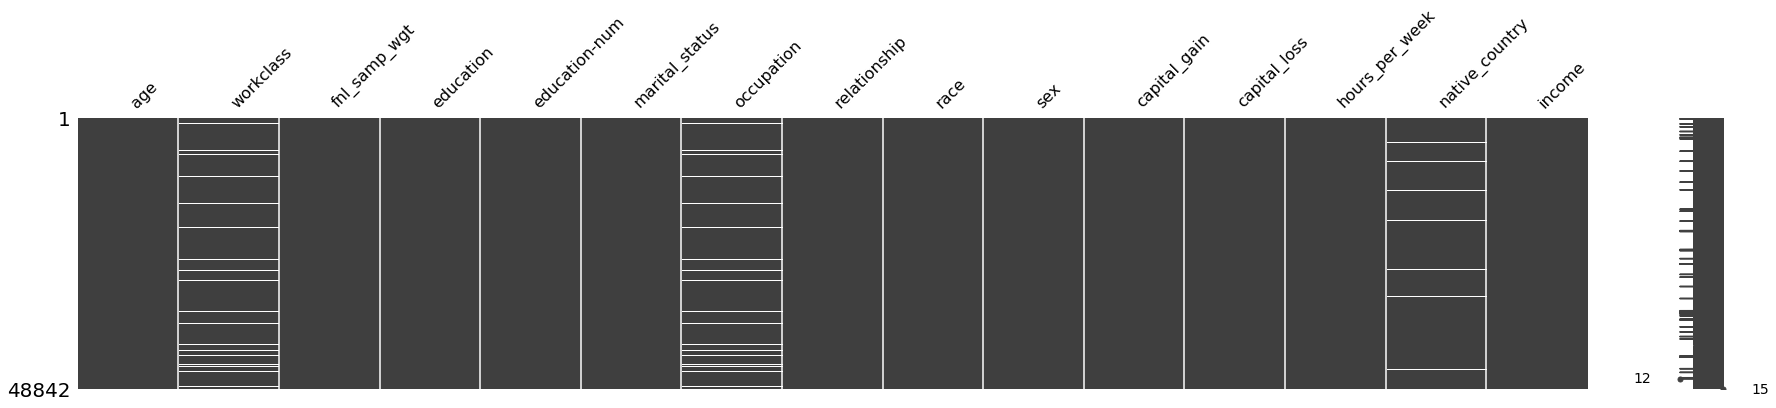

In [9]:
missingno.matrix(df_full, figsize = (30,5))
plt.show()

In [10]:
# 7% of all rows contain NaN entries. As this is a relatively high number, we can try  predicting the missing values
# for the affected columns using a Random Forest but we need to tidy up the information first.

In [11]:
## Category bucketing: this dataset seems rather granular!

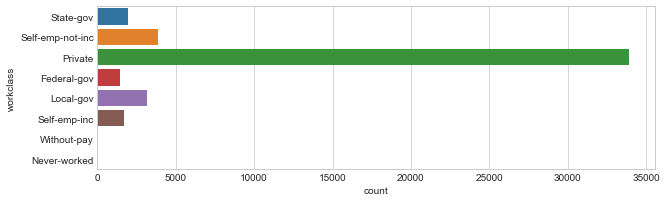

In [12]:
# WORKCLASS
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,3)) 
sns.countplot(y="workclass", data=df_full)
plt.show()

In [13]:
# Clearly the private sector dominates. I am grouping governmental, self-employed and no-pay activities together

In [14]:
df_full.loc[df_full['workclass'] == 'State-gov', 'workclass'] = 'Governmental'
df_full.loc[df_full['workclass'] == 'Federal-gov', 'workclass'] = 'Governmental'
df_full.loc[df_full['workclass'] == 'Local-gov', 'workclass'] = 'Governmental'

df_full.loc[df_full['workclass'] == 'Self-emp-not-inc', 'workclass'] = 'Self-employed'
df_full.loc[df_full['workclass'] == 'Self-emp-inc', 'workclass'] = 'Self-employed'

df_full.loc[df_full['workclass'] == 'Without-pay', 'workclass'] = 'No-pay'
df_full.loc[df_full['workclass'] == 'Never-worked', 'workclass'] = 'No-pay'

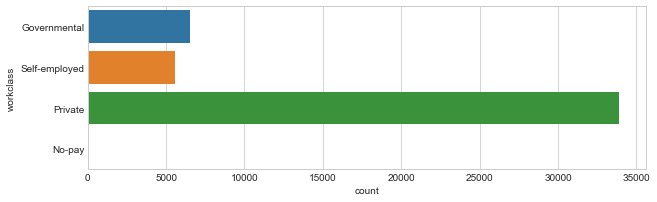

In [15]:
# WORKCLASS
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,3)) 
sns.countplot(y="workclass", data=df_full)
plt.show()

In [16]:
# EDUCATION
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6)) 
sns.countplot(y="education", data=df_full)
plt.show()

In [17]:
# Grouping by education level
df_full.loc[df_full['education'] == 'Preschool', 'education'] = 'Elementary'
df_full.loc[df_full['education'] == '1st-4th', 'education'] = 'Elementary'

df_full.loc[df_full['education'] == '5th-6th', 'education'] = 'Secondary'
df_full.loc[df_full['education'] == '7th-8th', 'education'] = 'Secondary'
df_full.loc[df_full['education'] == '9th', 'education'] = 'Secondary'
df_full.loc[df_full['education'] == '10th', 'education'] = 'Secondary'
df_full.loc[df_full['education'] == '11th', 'education'] = 'Secondary'
df_full.loc[df_full['education'] == '12th', 'education'] = 'Secondary'

df_full.loc[df_full['education'] == 'HS-grad', 'education'] = 'Highschool'
df_full.loc[df_full['education'] == 'Some-college', 'education'] = 'Highschool'

df_full.loc[df_full['education'] == 'Assoc-acdm', 'education'] = 'Associate'
df_full.loc[df_full['education'] == 'Assoc-voc', 'education'] = 'Associate'

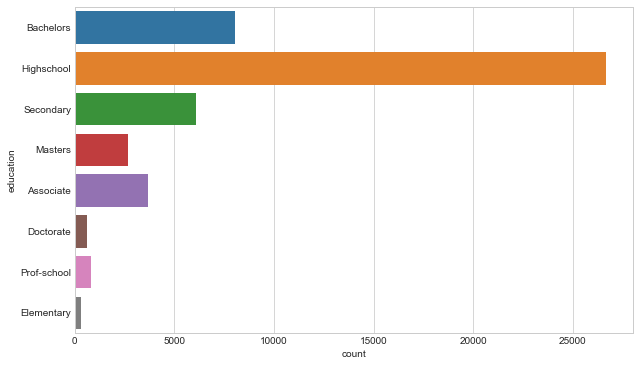

In [18]:
# EDUCATION
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6)) 
sns.countplot(y="education", data=df_full)
plt.show()

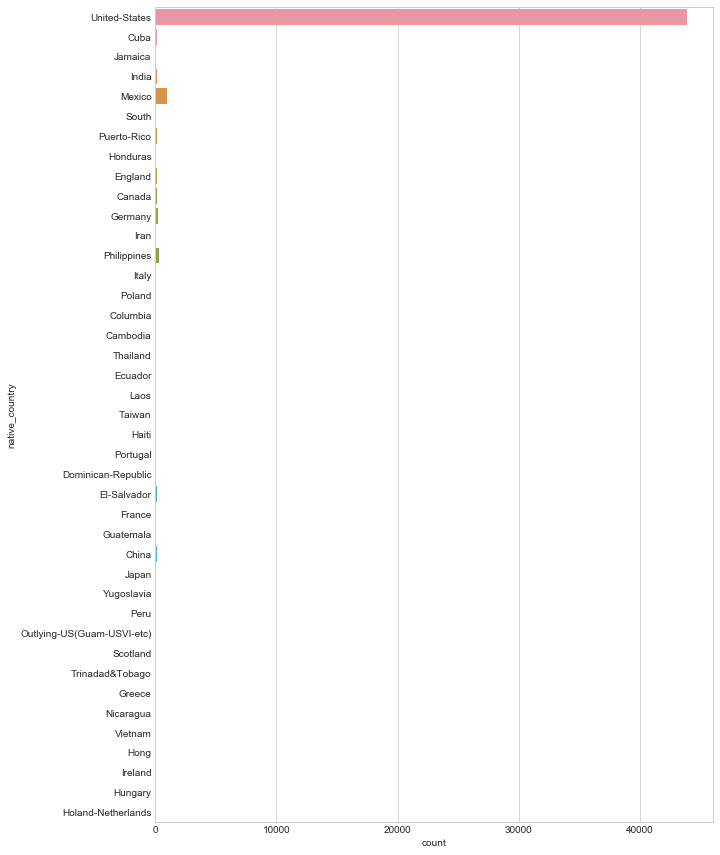

In [19]:
# NATIVE COUNTRY
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,15)) 
sns.countplot(y="native_country", data=df_full)
plt.show()

In [20]:
# Grouping by area
df_full.loc[df_full['native_country'] == 'Cuba', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Jamaica', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Mexico', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'South', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Puerto-Rico', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Hondura', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Columbia', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Ecuador', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Haiti', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Dominican-Republic', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Guatemala', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Trinadad&Tobago', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Nicaragua', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Peru', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'El-Salvador', 'native_country'] = 'Latine-americas-and-carribeans'
df_full.loc[df_full['native_country'] == 'Honduras', 'native_country'] = 'Latine-americas-and-carribeans'

df_full.loc[df_full['native_country'] == 'Holand-Netherlands', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Ireland', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Greece', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Scotland', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Holand-Netherlands', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'France', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Portugal', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'England', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Germany', 'native_country'] = 'Western-europe'
df_full.loc[df_full['native_country'] == 'Italy', 'native_country'] = 'Western-europe'

df_full.loc[df_full['native_country'] == 'Hungary', 'native_country'] = 'Eastern-europe'
df_full.loc[df_full['native_country'] == 'Yugoslavia', 'native_country'] = 'Eastern-europe'
df_full.loc[df_full['native_country'] == 'Poland', 'native_country'] = 'Eastern-europe'

df_full.loc[df_full['native_country'] == 'Outlying-US(Guam-USVI-etc)', 'native_country'] = 'United-States'

df_full.loc[df_full['native_country'] == 'Japan', 'native_country'] = 'Eastern-asia'
df_full.loc[df_full['native_country'] == 'China', 'native_country'] = 'Eastern-asia'
df_full.loc[df_full['native_country'] == 'Hong', 'native_country'] = 'Eastern-asia'
df_full.loc[df_full['native_country'] == 'Taiwan', 'native_country'] = 'Eastern-asia'


df_full.loc[df_full['native_country'] == 'Vietnam', 'native_country'] = 'Southern-asia'
df_full.loc[df_full['native_country'] == 'Laos', 'native_country'] = 'Southern-asia'
df_full.loc[df_full['native_country'] == 'Vietnam', 'native_country'] = 'Southern-asia'
df_full.loc[df_full['native_country'] == 'Thailand', 'native_country'] = 'Southern-asia'
df_full.loc[df_full['native_country'] == 'Cambodia', 'native_country'] = 'Southern-asia'
df_full.loc[df_full['native_country'] == 'Philippines', 'native_country'] = 'Southern-asia'

df_full.loc[df_full['native_country'] == 'Iran', 'native_country'] = 'Middle-east'


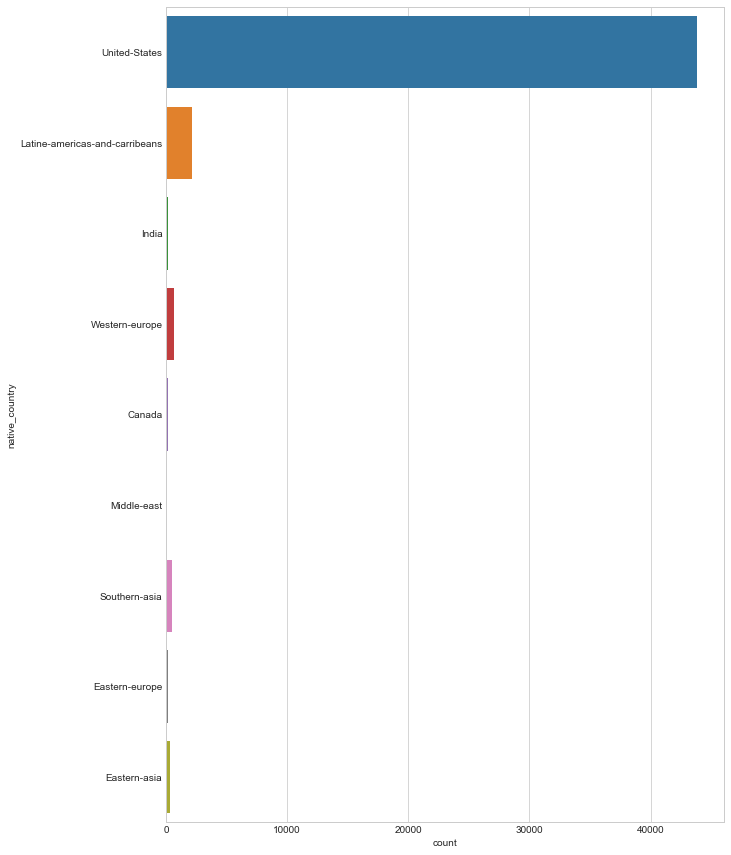

In [21]:
# NATIVE COUNTRY
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,15)) 
sns.countplot(y="native_country", data=df_full)
plt.show()

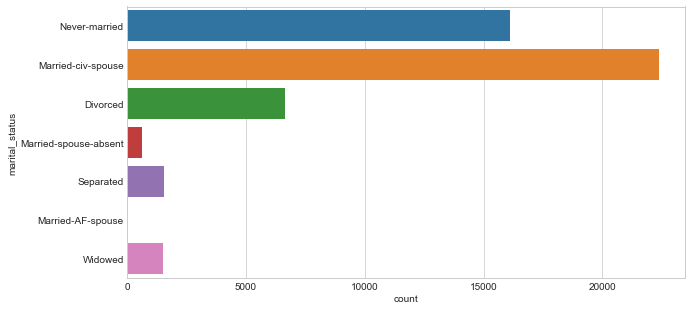

In [22]:
# MARITAL STATUS
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5)) 
sns.countplot(y="marital_status", data=df_full)
plt.show()

In [23]:
# Grouping married and separated
df_full.loc[df_full['marital_status'] == 'Married-civ-spouse', 'marital_status'] = 'Married'
df_full.loc[df_full['marital_status'] == 'Married-spouse-absent', 'marital_status'] = 'Married'
df_full.loc[df_full['marital_status'] == 'Married-AF-spouse', 'marital_status'] = 'Married'

df_full.loc[df_full['marital_status'] == 'Divorced', 'marital_status'] = 'Separated'
df_full.loc[df_full['marital_status'] == 'Separated', 'marital_status'] = 'Separated'

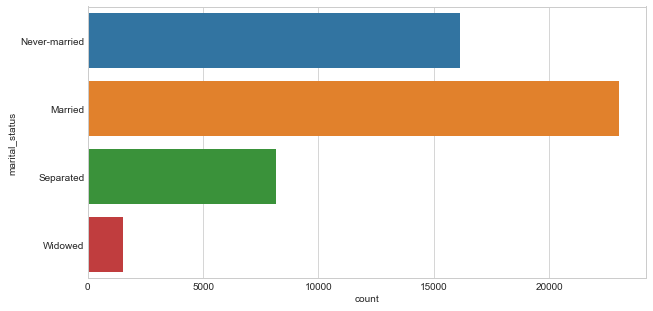

In [24]:
# MARITAL STATUS
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 5)) 
sns.countplot(y="marital_status", data=df_full)
plt.show()

In [25]:
#OCCUPATION
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10)) 
sns.countplot(y="occupation", data=df_full)
plt.show()

In [26]:
# Grouping by activity sector
df_full.loc[df_full['occupation'] == 'Adm-clerical', 'occupation'] = 'Civil-service'
df_full.loc[df_full['occupation'] == 'Armed-Forces', 'occupation'] = 'Civil-service'

df_full.loc[df_full['occupation'] == 'Exec-managerial', 'occupation'] = 'Managerial'

df_full.loc[df_full['occupation'] == 'Tech-support', 'occupation'] = 'Technical'
df_full.loc[df_full['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Technical'
df_full.loc[df_full['occupation'] == 'Craft-repair', 'occupation'] = 'Technical'

df_full.loc[df_full['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Low-qualif'
df_full.loc[df_full['occupation'] == 'Transport-moving', 'occupation'] = 'Low-qualif'


df_full.loc[df_full['occupation'] == 'Protective-serv', 'occupation'] = 'Services'
df_full.loc[df_full['occupation'] == 'Priv-house-serv', 'occupation'] = 'Services'
df_full.loc[df_full['occupation'] == 'Other-service', 'occupation'] = 'Services'

In [27]:
#OCCUPATION
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10)) 
sns.countplot(y="occupation", data=df_full)
plt.show()

In [28]:
df_full.head()

age      workclass  fnl_samp_wgt   education  education-num marital_status  \
0   39   Governmental         77516   Bachelors             13  Never-married   
1   50  Self-employed         83311   Bachelors             13        Married   
2   38        Private        215646  Highschool              9      Separated   
3   53        Private        234721   Secondary              7        Married   
4   28        Private        338409   Bachelors             13        Married   

       occupation   relationship   race     sex  capital_gain  capital_loss  \
0   Civil-service  Not-in-family  White    Male          2174             0   
1      Managerial        Husband  White    Male             0             0   
2      Low-qualif  Not-in-family  White    Male             0             0   
3      Low-qualif        Husband  Black    Male             0             0   
4  Prof-specialty           Wife  Black  Female             0             0   

   hours_per_week                  native_country  income  
0              40                   United-States       0  
1              13                   United-States       0  
2              40                   United-States       0  
3              40                   United-States       0  
4              40  Latine-americas-and-carribeans       0

In [29]:
## CORRELATED VARIABLES

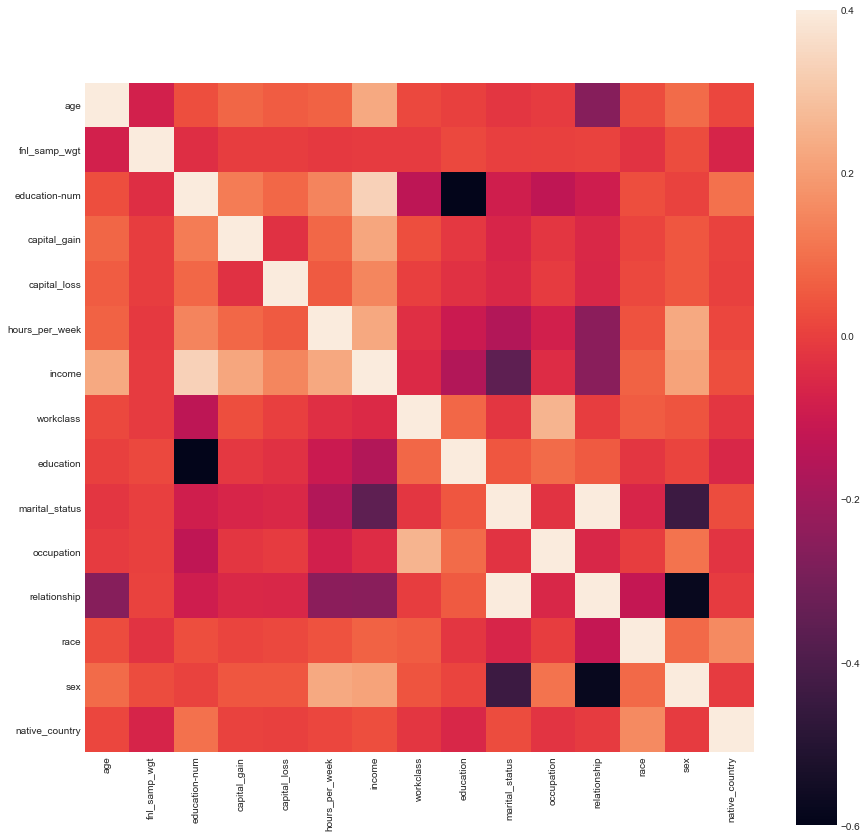

In [30]:
# To explore correlation between variable, one can encode their labels with numbers 
# I got inspired from the prescriptions give on: http://pbpython.com/categorical-encoding.html
le = LabelEncoder()
df_encode = df_full[df_full.select_dtypes('object').columns].copy()
df_codes = pd.DataFrame()

for column in df_encode.columns.tolist():
    df_codes[column]=le.fit_transform(df_encode[column].astype(str))

df_corr = pd.concat([df_full[df_full.select_dtypes('int').columns],df_codes], axis=1, join='inner')

plt.figure(figsize=(15,15)) 
sns.heatmap(df_corr.corr(), square=True, vmax= 0.4, vmin=-0.6)
plt.show()

In [31]:
# Observation 1:  One can see that the 'relationship' and 'marital_status' are highly correlated. 
# As expected, 'education' and 'education_num' are also highly anticorrelated
# Let's get rid of the 'relationship' and 'education_num' columns. 

# Observation 2: Features are highly correlated so we CAN'T use logistic regression for the ML model

In [32]:
df_full = df_full.drop(['relationship', 'education-num'], 1)
df_corr = df_corr.drop(['relationship', 'education-num'], 1)

df_corr.to_csv(samplePath + 'encodedLabels.csv', sep=',') # saving data with encoded labels for future usage

In [33]:
### PART 1B: MISSING VALUES GUESS ###

In [34]:
# I am using a Random Forest Classifier to infer the missing values as it usually does a good job for categorization 

In [35]:
## WORKCLASS MISSING VALUES

In [36]:
# Function to encode categorical data (transforming object entries into One Hot matrices) taken from scikitlearn documentation
def prepOneHot(mydf): 
    dfNoObject = mydf.drop(columns = mydf.select_dtypes('object').columns, axis = 1) #getting rid of object data (categories)
    dfEncoded = pd.get_dummies(mydf[mydf.select_dtypes('object').columns.tolist()]) # one-hotting the object
    return(pd.concat([dfNoObject, dfEncoded], axis=1, join='inner')) 

In [37]:
test_workclass = df_full[df_full['workclass'].isnull()==True].copy() 
test_label_workclass = test_workclass.workclass.astype(str)
train_workclass = df_full[df_full['workclass'].isnull()==False].copy()
train_label_workclass = train_workclass.workclass

In [38]:
# Candidate who don't have 'occupation' info, don't have 'workclass' info either. 
# Let's drop these columns in the train sample.

In [39]:
train_workclass = train_workclass.drop(['occupation','workclass'],1)
test_workclass = test_workclass.drop(['occupation','workclass'],1)

In [40]:
train_workclass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 11 columns):
age               46043 non-null int64
fnl_samp_wgt      46043 non-null int64
education         46043 non-null object
marital_status    46043 non-null object
race              46043 non-null object
sex               46043 non-null object
capital_gain      46043 non-null int64
capital_loss      46043 non-null int64
hours_per_week    46043 non-null int64
native_country    45232 non-null object
income            46043 non-null int64
dtypes: int64(6), object(5)
memory usage: 4.2+ MB


In [41]:
test_workclass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 27 to 48838
Data columns (total 11 columns):
age               2799 non-null int64
fnl_samp_wgt      2799 non-null int64
education         2799 non-null object
marital_status    2799 non-null object
race              2799 non-null object
sex               2799 non-null object
capital_gain      2799 non-null int64
capital_loss      2799 non-null int64
hours_per_week    2799 non-null int64
native_country    2753 non-null object
income            2799 non-null int64
dtypes: int64(6), object(5)
memory usage: 262.4+ KB


In [42]:
train_workclass_prep = prepOneHot(train_workclass)
test_workclass_prep = prepOneHot(test_workclass)

In [43]:
rf1 = RandomForestClassifier(n_estimators=10)
rf1.fit(train_workclass_prep, train_label_workclass)
rf1_prediction = rf1.predict(test_workclass_prep)

In [44]:
df1_prediction=pd.DataFrame(rf1_prediction, columns=['pred'])
df_full.loc[df_full['workclass'].isnull(),"workclass"] = df1_prediction['pred'].values

In [45]:
df_full.head()

age      workclass  fnl_samp_wgt   education marital_status  \
0   39   Governmental         77516   Bachelors  Never-married   
1   50  Self-employed         83311   Bachelors        Married   
2   38        Private        215646  Highschool      Separated   
3   53        Private        234721   Secondary        Married   
4   28        Private        338409   Bachelors        Married   

       occupation   race     sex  capital_gain  capital_loss  hours_per_week  \
0   Civil-service  White    Male          2174             0              40   
1      Managerial  White    Male             0             0              13   
2      Low-qualif  White    Male             0             0              40   
3      Low-qualif  Black    Male             0             0              40   
4  Prof-specialty  Black  Female             0             0              40   

                   native_country  income  
0                   United-States       0  
1                   United-States       0  
2                   United-States       0  
3                   United-States       0  
4  Latine-americas-and-carribeans       0

In [46]:
## OCCUPATION MISSING VALUES

In [47]:
test_occupation = df_full[df_full['occupation'].isnull()==True].copy() 
test_label_occupation = test_occupation.occupation.astype(str)
train_occupation = df_full[df_full['occupation'].isnull()==False].copy()
train_label_occupation = train_occupation.occupation

In [48]:
# Candidate who don't have 'occupation' info, don't have 'workclass' info either. 
# Let's drop these columns in the train sample.

In [49]:
train_occupation = train_occupation.drop(['occupation','workclass'],1)
test_occupation = test_occupation.drop(['occupation','workclass'],1)

In [50]:
test_occupation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2809 entries, 27 to 48838
Data columns (total 11 columns):
age               2809 non-null int64
fnl_samp_wgt      2809 non-null int64
education         2809 non-null object
marital_status    2809 non-null object
race              2809 non-null object
sex               2809 non-null object
capital_gain      2809 non-null int64
capital_loss      2809 non-null int64
hours_per_week    2809 non-null int64
native_country    2763 non-null object
income            2809 non-null int64
dtypes: int64(6), object(5)
memory usage: 263.3+ KB


In [51]:
train_occupation_prep = prepOneHot(train_occupation)
test_occupation_prep = prepOneHot(test_occupation)

In [52]:
rf2 = RandomForestClassifier(n_estimators=10)
rf2.fit(train_occupation_prep, train_label_occupation)
rf2_prediction = rf2.predict(test_occupation_prep)

In [53]:
df2_prediction=pd.DataFrame(rf2_prediction, columns=['pred'])
df_full.loc[df_full['occupation'].isnull(),"occupation"] =  df2_prediction['pred'].values

In [54]:
df_full.head()

age      workclass  fnl_samp_wgt   education marital_status  \
0   39   Governmental         77516   Bachelors  Never-married   
1   50  Self-employed         83311   Bachelors        Married   
2   38        Private        215646  Highschool      Separated   
3   53        Private        234721   Secondary        Married   
4   28        Private        338409   Bachelors        Married   

       occupation   race     sex  capital_gain  capital_loss  hours_per_week  \
0   Civil-service  White    Male          2174             0              40   
1      Managerial  White    Male             0             0              13   
2      Low-qualif  White    Male             0             0              40   
3      Low-qualif  Black    Male             0             0              40   
4  Prof-specialty  Black  Female             0             0              40   

                   native_country  income  
0                   United-States       0  
1                   United-States       0  
2                   United-States       0  
3                   United-States       0  
4  Latine-americas-and-carribeans       0

In [55]:
## NATIVE COUNTRY MISSING VALUES

In [56]:
test_native_country = df_full[df_full['native_country'].isnull()==True].copy() 
test_label_native_country = test_native_country.native_country.astype(str)
train_native_country = df_full[df_full['native_country'].isnull()==False].copy()
train_label_native_country = train_native_country.native_country

In [57]:
train_native_country = train_native_country.drop(['native_country'],1)
test_native_country = test_native_country.drop(['native_country'],1)

In [58]:
train_native_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47985 entries, 0 to 48841
Data columns (total 12 columns):
age               47985 non-null int64
workclass         47985 non-null object
fnl_samp_wgt      47985 non-null int64
education         47985 non-null object
marital_status    47985 non-null object
occupation        47985 non-null object
race              47985 non-null object
sex               47985 non-null object
capital_gain      47985 non-null int64
capital_loss      47985 non-null int64
hours_per_week    47985 non-null int64
income            47985 non-null int64
dtypes: int64(6), object(6)
memory usage: 4.8+ MB


In [59]:
test_native_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 14 to 48826
Data columns (total 12 columns):
age               857 non-null int64
workclass         857 non-null object
fnl_samp_wgt      857 non-null int64
education         857 non-null object
marital_status    857 non-null object
occupation        857 non-null object
race              857 non-null object
sex               857 non-null object
capital_gain      857 non-null int64
capital_loss      857 non-null int64
hours_per_week    857 non-null int64
income            857 non-null int64
dtypes: int64(6), object(6)
memory usage: 87.0+ KB


In [60]:
train_native_country_prep = prepOneHot(train_native_country)
test_native_country_prep = prepOneHot(test_native_country)

In [61]:
train_native_country_prep = train_native_country_prep.drop(['race_Amer-Indian-Eskimo','workclass_No-pay'],1)
# I am removing those as these do no match the missing data subsample

In [62]:
rf3 = RandomForestClassifier(n_estimators=10)
rf3.fit(train_native_country_prep, train_label_native_country)
rf3_prediction = rf3.predict(test_native_country_prep)

In [63]:
df3_prediction=pd.DataFrame(rf3_prediction, columns=['pred'])
df_full.loc[df_full['native_country'].isnull(),"native_country"] =  df3_prediction['pred'].values

In [64]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnl_samp_wgt      48842 non-null int64
education         48842 non-null object
marital_status    48842 non-null object
occupation        48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null int64
dtypes: int64(6), object(7)
memory usage: 4.8+ MB


In [65]:
df_full.to_csv(samplePath +'full_sample_clean.csv', sep=',') 

In [66]:
df_oneHot = prepOneHot(df_full)

In [67]:
df_oneHot.to_csv(samplePath + 'encodedOneHot.csv', sep=',') #savong for later usage

In [68]:
# DONE!

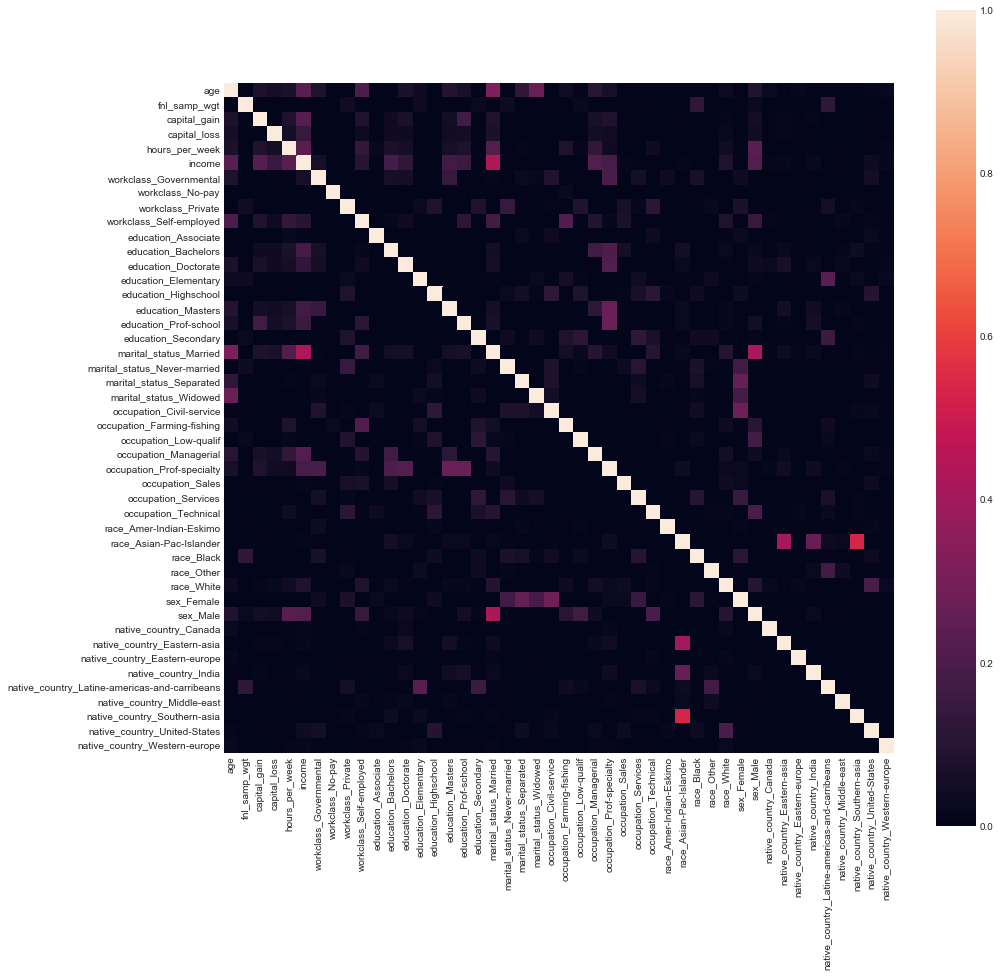

In [69]:
plt.figure(figsize=(15,15)) 
sns.heatmap(prepOneHot(df_full).corr(), square=True, vmin= 0)
plt.show()